# Kolymbia Bay energy system model

Modelling two variations of rooftop PV panels (IBC and Thin film) on buildings 1, 2, 4 and, 5 as well as BIPV on balconies (buildings 1-3) and the south facade of building 1. 
Buildings 1,2,4 and, 5 have roof area available for rooftop PV at areas of 120, 110, 84 and 140 (sqm) respectively. 
Balcony area available on buildings 1, 2 and, 3 are 36, 10 and 36 (sqm) respectively.
Facade area available for BIPV on building 1 = 17sqm. 


Modelling each building as a different location to account for installation costs which include DC cables to connect each building to the energy metre. 
Each building labelled Building1, Building2 ....
and the energy metre labelled as KolymbiaBay

7 model runs:
1. Utility only 
2. 25 degrees tilt, no limit to CO2 emissions (optimal cost), full energy demand
3. 25 degrees tilt, max limit to CO2 emissions, full energy demand
4. 8 degrees tilt, no limit to CO2 emissions (optimal cost), full energy demand
5. 8 degrees tilt, max limit to CO2 emissions, full energy demand
6. 8 degrees tilt, no limit to CO2 emissions (optimal cost), reduced energy demand
7. 8 degrees tilt, max limit to CO2 emissions, reduced energy demand

max limit to CO2 emissions found when CO2 reduction target results in an 'infeasible solution' meaning the energy system is not sustainable without greater inputs from the utility provider.

The listed runs will analyse:

- the preferred PV tech 
1. high efficency, high cost 
2. low efficiency, low cost
3. BIPV

- Optimum tilt angle. 
The optimum angle varies throughout the year. Will the PV system be more effective with the optimum tilt required for max generation in July and August when demand is high (8 degrees) or is it better to have an average tilt that is optimal for annual generation (25 degrees).

- The effect of energy saving strategies
Looking at hotel specific data ~ 50% of energy demand during summer accounts for cooling. Can run same model with 80% energy demand during the months April-October to mimic reduced energy consumption. 

This is carried out at hourly timesteps

Inverter = Power Electronics: FS1003CU

Comparing the CO2 emissions and cost associated with each combination. 

## Sources
1. PV IBC, Roof 1
2. PV IBC, Roof 2
3. PV IBC, Roof 4
4. PV IBC, Roof 5


5. Thin film, Roof 1
6. Thin film, Roof 2
7. Thin film, Roof 4
8. Thin film, Roof 5


9. BIPV, Balcony 1
10. BIPV, Balcony 2
11. BIPV, Balcony 3
12. BIPV, South facade



13. Utility provider (electricity)



# Sinks
1. Hotel Electricity Demand 
2. CO2 to environment 
3. Utility provider (for surplus generation)

# Conversion 
1. Inverter 
2. Virtual CO2 conversion (energy from prover to CO2 emissions)

# Storage 
No storage - assuming net metering system only

# Transmission

Cables between buildings

Set hotel as a location - 1 demand for 'kolymbia Bay' 0 for the rest (5 buildings).
Hotel location doesnt have any potential to produce energy from PV
Transmission to transfer from PV generation on buildings to demand in energy metre 


# Import packages

In [1]:
import FINE as fn
from getData import getData

import pandas as pd
import os
import openpyxl

cwd = os.getcwd()
data = getData()


# Input parameters

In [2]:
# define locations 
locations = {'Building1', 'Building2', 'Building3', 'Building4', 'Building5', 'KolymbiaBay'} #need hotel as location??
commodityUnitDict = {"powerAC": r"kW$_{el}$", "powerDC": r"kW$_{el}$", "CO2": r"kg$_{CO_2}$/h", "utility":r"kW$_{el}$"}
commodities = {"powerAC", "powerDC", "CO2", "utility" }
numberOfTimeSteps = 8760
hoursPerTimeStep = 1

# Code
esM = fn.EnergySystemModel(locations=locations, commodities=commodities,
    numberOfTimeSteps=numberOfTimeSteps, commodityUnitsDict=commodityUnitDict,
    hoursPerTimeStep=hoursPerTimeStep, verboseLogLevel=0)

# Create energy system model

In [3]:
esM = fn.EnergySystemModel(
    locations=locations,
    commodities=commodities,
    numberOfTimeSteps=numberOfTimeSteps,
    commodityUnitsDict=commodityUnitDict,
    hoursPerTimeStep=hoursPerTimeStep,
    costUnit="Euro",
    lengthUnit="km",
    verboseLogLevel=0,
)

# Source: Interdigitated Back Contact (IBC) PV

Add data

Change operation_25 to operation_8 in variations 4,5,6,7

For 'utility only' comment out all PV sources 

In [4]:
IBC_operationRateMax = pd.read_excel(os.path.join('/Users/zaramulholland/Desktop/DataModelling/IBC.xlsx'),  
                                     sheet_name ='operation_25',header = 0, index_col = 0, engine='openpyxl')
IBC_capacityMax = pd.read_excel(os.path.join('/Users/zaramulholland/Desktop/DataModelling/IBC.xlsx'),  
                                sheet_name ='capacities', index_col=0, engine='openpyxl',squeeze=True)

Add source to model

In [5]:
esM.add(fn.Source(esM=esM, 
                  name='PV_IBC', 
                  commodity='powerDC', 
                  hasCapacityVariable=True,
                  operationRateMax=IBC_operationRateMax, 
                  capacityMax=IBC_capacityMax,
                  investIfBuilt=700, #labour cost 2 days
                  investPerCapacity=812.3, #total cost for given area divided by capacity for that area
                  opexPerCapacity=812.3*0.02, #maintainence
                  interestRate=0.08, #assume 8 percent
                  economicLifetime=25,
                  hasIsBuiltBinaryVariable=True,
                  bigM=50,
                  sharedPotentialID='rooftop')) #prevents IBC and thinfilm at same time



# Source: PV thin film 

Add data

Change operation_25 to operation_8 in variations 4,5,6,7

For 'utility only' comment out all PV sources 

In [6]:
thinfilm_operationRateMax = pd.read_excel(os.path.join('/Users/zaramulholland/Desktop/DataModelling/thinfilm.xlsx'),  
                                     sheet_name ='operation_25',header = 0, index_col = 0, engine='openpyxl')
thinfilm_capacityMax = pd.read_excel(os.path.join('/Users/zaramulholland/Desktop/DataModelling/thinfilm.xlsx'),  
                                sheet_name ='capacities', index_col=0, engine='openpyxl',squeeze=True)

In [7]:
#less maintainance and cheaper to install, shorter economiclifetime
esM.add(fn.Source(esM=esM, 
                  name='PV_thinfilm', 
                  commodity='powerDC', 
                  hasCapacityVariable=True,
                  operationRateMax=thinfilm_operationRateMax, 
                  capacityMax=thinfilm_capacityMax,
                  investIfBuilt=700, #labour cost 2 days 
                  investPerCapacity=1053, #total cost for given area divided by capacity for that area
                  opexPerCapacity=1053*0.01, #maintainence
                  interestRate=0.08, #assume 8 percent
                  economicLifetime=20,
                  hasIsBuiltBinaryVariable=True,
                  bigM=50,
                  sharedPotentialID='rooftop')) #shared potential to stop IBC and thinfilm on same area.
                 

# Source: BIPV balcony 

Add data

For 'utility only' comment out all PV sources 

In [8]:
BALC_operationRateMax = pd.read_excel(os.path.join('/Users/zaramulholland/Desktop/DataModelling/PV_BALC.xlsx'),  
                                     sheet_name ='BALC_operation_hourly_group',header = 0, index_col = 0, engine='openpyxl')
BALC_capacityMax = pd.read_excel(os.path.join('/Users/zaramulholland/Desktop/DataModelling/PV_BALC.xlsx'),  
                                sheet_name ='BALC_capacities', index_col=0, engine='openpyxl',squeeze=True)

Add source

In [9]:
esM.add(fn.Source(esM=esM, 
                  name='PV_BALC', 
                  commodity='powerDC', 
                  hasCapacityVariable=True,
                  operationRateMax=BALC_operationRateMax, 
                  capacityMax=BALC_capacityMax,
                  investIfBuilt=700, #labour cost 2 days
                  investPerCapacity=407.5, #total cost for given area divided by capacity for that area
                  opexPerCapacity=407.5*0.03, #maintainence greater
                  interestRate=0.08,
                  hasIsBuiltBinaryVariable=True,
                  bigM=50,
                  economicLifetime=35,))
               

#ONYX

# Source: BIPV south facade

For 'utility only' comment out all PV sources 

In [10]:
SOUTH_operationRateMax = pd.read_excel(os.path.join('/Users/zaramulholland/Desktop/DataModelling/PV_SOUTH.xlsx'),  
                                     sheet_name ='SOUTH_operation_hourly_group',header = 0, index_col = 0, engine='openpyxl')
SOUTH_capacityMax = pd.read_excel(os.path.join('/Users/zaramulholland/Desktop/DataModelling/PV_SOUTH.xlsx'),  
                                sheet_name ='SOUTH_capacities', index_col=0, engine='openpyxl',squeeze=True)


In [11]:
esM.add(fn.Source(esM=esM, 
                  name='PV_SOUTH', 
                  commodity='powerDC', 
                  hasCapacityVariable=True,
                  operationRateMax=SOUTH_operationRateMax, 
                  capacityMax=SOUTH_capacityMax,
                  investIfBuilt=700, #labour cost 2 days
                  investPerCapacity=696.7, 
                  opexPerCapacity=696.7*0.02,
                  hasIsBuiltBinaryVariable=True,
                  bigM=50,
                  interestRate=0.08,
                  economicLifetime=25))

# Source: Electricity provider

In [12]:
# import locationalEligibility Dataframe
CO2_locs= pd.read_excel(os.path.join('/Users/zaramulholland/Desktop/DataModelling/LocationalEligability.xlsx'),  
                                sheet_name ='Locs', index_col=0, engine='openpyxl',squeeze=True)

In [13]:
esM.add(fn.Source(esM=esM, 
                  name='Utility', 
                  commodity='utility', 
                  hasCapacityVariable=False,
                  commodityCost=0.0779, # from energy bills (euro/kWh)
                  locationalEligibility=CO2_locs,
                )) 


# Conversion: Virtual Conversion CO2

In [14]:
esM.add(
            fn.Conversion(
                esM=esM,
                name="CO2Emissions",
                physicalUnit=r"kW$_{el}$",
                commodityConversionFactors={"utility": -1, "powerAC": 1, "CO2":0.42},
                locationalEligibility=CO2_locs,
                
            )
        ) 
#  CO2 component - 0.42kg/kWh

# Conerverion: Inverter

In [15]:

esM.add(
            fn.Conversion(
                esM=esM,
                name="Inverter",
                physicalUnit=r"kW$_{el}$",
                commodityConversionFactors={"powerAC": 0.97, "powerDC": -1},
                locationalEligibility=CO2_locs,
            )
        )

# Transmisson

add data for locationaleligibility and cost of cabling between buildings and energy metre. Assumed locations joined as follows:
1 joins to 2
2 joins to 3
3 joins to 4
4 joins to metre
5 joins to metre

In [16]:
Trans_locs= pd.read_excel(os.path.join('/Users/zaramulholland/Desktop/DataModelling/Transmission.xlsx'),  
                                sheet_name ='LocationalE', index_col=0, engine='openpyxl',squeeze=True)
Trans_cost= pd.read_excel(os.path.join('/Users/zaramulholland/Desktop/DataModelling/Transmission.xlsx'),  
                                sheet_name ='Cost', index_col=0, engine='openpyxl',squeeze=True)

In [17]:
esM.add(fn.Transmission(esM=esM, 
                        name='AC cables', 
                        commodity='powerAC',
                        hasCapacityVariable=True,
                        hasIsBuiltBinaryVariable=True,
                        locationalEligibility=Trans_locs,
                        investIfBuilt=Trans_cost,
                        bigM=50))

The distances of a component are set to a normalized value of 1.


In [18]:
esM.add(fn.Transmission(esM=esM, 
                        name='DC cables', 
                        commodity='powerDC',
                        hasCapacityVariable=True,
                        hasIsBuiltBinaryVariable=True,
                        locationalEligibility=Trans_locs,
                        investIfBuilt=Trans_cost,
                        bigM=100))
                        

The distances of a component are set to a normalized value of 1.


# Sink: Electricity demand 

In [19]:
# Electricity demand data
    operationRateFix = pd.read_excel(os.path.join("/Users/zaramulholland/Desktop/DataModelling/Hotel_EnergyDemand.xlsx"), 
                                     sheet_name='HotelDemand', header=0, index_col = 0,  engine='openpyxl')




In [20]:
# Add sink
esM.add(
    fn.Sink(
        esM=esM,
        name="Electricity demand",
        commodity="powerAC",
        hasCapacityVariable=False,
        operationRateFix=operationRateFix,
    )
)

# Sink: Add utility provider as a sink (surplus from PV generation)

In [21]:
esM.add(
    fn.Sink(
        esM=esM,
        name="Surplus to Utility",
        commodity="powerAC",
        hasCapacityVariable=False,
        locationalEligibility=CO2_locs  
    )
)



# Sink: CO2 to environment

In [22]:
CO2_reductionTarget = 1

In [23]:
esM.add(fn.Sink(esM=esM, name='CO2 to enviroment', commodity='CO2',
                hasCapacityVariable=False,
                locationalEligibility=CO2_locs,
                commodityLimitID='CO2 limit',
                
                yearlyLimit=161599*(CO2_reductionTarget))) # 161599 = CO2 emissions when all from utility
               


In [24]:
# Optimise (100 for increased accuracy) 

esM.cluster(numberOfTypicalPeriods=10)


Clustering time series data with 10 typical periods and 24 time steps per period...
		(0.9973 sec)



In [25]:
esM.optimize(timeSeriesAggregation=True, solver="glpk")

Time series aggregation specifications:
Number of typical periods:10, number of time steps per period:24

Declaring sets, variables and constraints for SourceSinkModel
	declaring sets... 
	declaring variables... 
	declaring constraints... 
		(0.2609 sec)

Declaring sets, variables and constraints for ConversionModel
	declaring sets... 
	declaring variables... 
	declaring constraints... 
		(0.0216 sec)

Declaring sets, variables and constraints for TransmissionModel
	declaring sets... 
	declaring variables... 
	declaring constraints... 
		(0.2162 sec)

Declaring shared potential constraint...
		(0.0007 sec)

Declaring linked component quantity constraint...
		(0.0000 sec)

Declaring commodity balances...
		(0.2784 sec)

		(0.0003 sec)

Declaring objective function...
		(0.0738 sec)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /var/folders/4j/c81mn4v50575c7kg4t3hp85r0000gn/T/tmp2hf3d5eb.glpk.raw
 --wglp /var/folders/4j/c81mn4v50575c7kg4t3hp85r00

 /Users/zaramulholland/opt/anaconda3/envs/FINE_test/lib/python3.6/site-packages/FINE/component.py:1651: UserWarning:the capacity of component DC cables is in one or more locations close or equal to the chosen Big M. Consider rerunning the simulation with a higher Big M.


for TransmissionModel ...  (1.7183sec)
		(3.0744 sec)



In [26]:
srcSnkSummary = esM.getOptimizationSummary("SourceSinkModel", outputLevel=1)
display(esM.getOptimizationSummary("SourceSinkModel", outputLevel=2))

Building1 Building2  \
Component          Property     Unit                                      
CO2 to enviroment  operation    [kg$_{CO_2}$/h*h/a]       NaN       NaN   
                                [kg$_{CO_2}$/h*h]         NaN       NaN   
Electricity demand operation    [kW$_{el}$*h/a]           NaN       NaN   
                                [kW$_{el}$*h]             NaN       NaN   
PV_BALC            TAC          [Euro/a]              310.168         0   
                   capacity     [kW$_{el}$]               5.3         0   
                   capexCap     [Euro/a]              185.314         0   
                   capexIfBuilt [Euro/a]              60.0623         0   
                   invest       [Euro]                2859.75         0   
                   isBuilt      [-]                         1         0   
                   operation    [kW$_{el}$*h/a]       5557.26         0   
                                [kW$_{el}$*h]         5557.26         0   
                   opexCap      [Euro/a]              64.7925         0   
PV_IBC             TAC          [Euro/a]              2235.28   2466.45   
                   capacity     [kW$_{el}$]           23.4966        26   
                   capexCap     [Euro/a]              1787.98   1978.48   
                   capexIfBuilt [Euro/a]              65.5751   65.5751   
                   invest       [Euro]                19786.3   21819.8   
                   isBuilt      [-]                         1         1   
                   operation    [kW$_{el}$*h/a]       37828.5   53794.5   
                                [kW$_{el}$*h]         37828.5   53794.5   
                   opexCap      [Euro/a]              381.725   422.396   
Surplus to Utility operation    [kW$_{el}$*h/a]           NaN       NaN   
                                [kW$_{el}$*h]             NaN       NaN   
Utility            TAC          [Euro/a]                    0         0   
                   commodCosts  [Euro/a]                  NaN       NaN   
                   operation    [kW$_{el}$*h/a]           NaN       NaN   
                                [kW$_{el}$*h]             NaN       NaN   

                                                    Building3 Building4  \
Component          Property     Unit                                      
CO2 to enviroment  operation    [kg$_{CO_2}$/h*h/a]       NaN       NaN   
                                [kg$_{CO_2}$/h*h]         NaN       NaN   
Electricity demand operation    [kW$_{el}$*h/a]           NaN       NaN   
                                [kW$_{el}$*h]             NaN       NaN   
PV_BALC            TAC          [Euro/a]              310.168         0   
                   capacity     [kW$_{el}$]               5.3       NaN   
                   capexCap     [Euro/a]              185.314       NaN   
                   capexIfBuilt [Euro/a]              60.0623       NaN   
                   invest       [Euro]                2859.75       NaN   
                   isBuilt      [-]                         1       NaN   
                   operation    [kW$_{el}$*h/a]       8815.97       NaN   
                                [kW$_{el}$*h]         8815.97       NaN   
                   opexCap      [Euro/a]              64.7925       NaN   
PV_IBC             TAC          [Euro/a]                    0         0   
                   capacity     [kW$_{el}$]               NaN         0   
                   capexCap     [Euro/a]                  NaN         0   
                   capexIfBuilt [Euro/a]                  NaN         0   
                   invest       [Euro]                    NaN         0   
                   isBuilt      [-]                       NaN         0   
                   operation    [kW$_{el}$*h/a]           NaN         0   
                                [kW$_{el}$*h]             NaN         0   
                   opexCap      [Euro/a]                  NaN         0   
S

In [27]:
srcSnkSummary

Building1 Building2  \
Component         Property       Unit                                      
CO2 to enviroment TAC            [Euro/a]                    0         0   
                  commodCosts    [Euro/a]                  NaN       NaN   
                  commodRevenues [Euro/a]                  NaN       NaN   
                  operation      [kg$_{CO_2}$/h*h/a]       NaN       NaN   
                                 [kg$_{CO_2}$/h*h]         NaN       NaN   
...                                                        ...       ...   
Utility           commodCosts    [Euro/a]                  NaN       NaN   
                  commodRevenues [Euro/a]                  NaN       NaN   
                  operation      [kW$_{el}$*h/a]           NaN       NaN   
                                 [kW$_{el}$*h]             NaN       NaN   
                  opexOp         [Euro/a]                  NaN       NaN   

                                                     Building3 Building4  \
Component         Property       Unit                                      
CO2 to enviroment TAC            [Euro/a]                    0         0   
                  commodCosts    [Euro/a]                  NaN       NaN   
                  commodRevenues [Euro/a]                  NaN       NaN   
                  operation      [kg$_{CO_2}$/h*h/a]       NaN       NaN   
                                 [kg$_{CO_2}$/h*h]         NaN       NaN   
...                                                        ...       ...   
Utility           commodCosts    [Euro/a]                  NaN       NaN   
                  commodRevenues [Euro/a]                  NaN       NaN   
                  operation      [kW$_{el}$*h/a]           NaN       NaN   
                                 [kW$_{el}$*h]             NaN       NaN   
                  opexOp         [Euro/a]                  NaN       NaN   

                                                     Building5 KolymbiaBay  
Component         Property       Unit                                       
CO2 to enviroment TAC            [Euro/a]                    0           0  
                  commodCosts    [Euro/a]                  NaN           0  
                  commodRevenues [Euro/a]                  NaN           0  
                  operation      [kg$_{CO_2}$/h*h/a]       NaN     91145.2  
                                 [kg$_{CO_2}$/h*h]         NaN     91145.2  
...                                                        ...         ...  
Utility           commodCosts    [Euro/a]                  NaN     16905.3  
                  commodRevenues [Euro/a]                  NaN           0  
                  operation      [kW$_{el}$*h/a]           NaN      217012  
                                 [kW$_{el}$*h]             NaN      217012  
                  opexOp         [Euro/a]                  NaN           0  

[76 rows x 6 columns]

In [28]:

#fn.writeOptimizationOutputToExcel(
 #   esM,
  #  outputFileName="/Users/zaramulholland/Desktop/Results/25degrees_noCO2limit",
   # optSumOutputLevel=0,
    #optValOutputLevel=0,)

In [29]:
esM.getOptimizationSummary("ConversionModel", outputLevel=2)

Building1 Building2 Building3  \
Component    Property  Unit                                            
CO2Emissions capacity  [kW$_{el}$]           NaN       NaN       NaN   
             operation [kW$_{el}$*h/a]       NaN       NaN       NaN   
                       [kW$_{el}$*h]         NaN       NaN       NaN   
Inverter     capacity  [kW$_{el}$]           NaN       NaN       NaN   
             operation [kW$_{el}$*h/a]       NaN       NaN       NaN   
                       [kW$_{el}$*h]         NaN       NaN       NaN   

                                       Building4 Building5 KolymbiaBay  
Component    Property  Unit                                             
CO2Emissions capacity  [kW$_{el}$]           NaN       NaN     103.824  
             operation [kW$_{el}$*h/a]       NaN       NaN      217012  
                       [kW$_{el}$*h]         NaN       NaN      217012  
Inverter     capacity  [kW$_{el}$]           NaN       NaN     114.225  
             operation [kW$_{el}$*h/a]       NaN       NaN      172962  
                       [kW$_{el}$*h]         NaN       NaN      172962

In [30]:
#fig, ax = fn.plotOperationColorMap(esM, "PV_IBC", "Building1")

In [31]:
#fig, ax = fn.plotOperationColorMap(esM, "PV_IBC", "Building2")

In [32]:
#fig, ax = fn.plotOperationColorMap(esM, "PV_BALC", "Building1")

In [33]:
#fig, ax = fn.plotOperationColorMap(esM, "PV_BALC", "Building3")

although daily operation period is short, still cost effienct as allows an additional energy input at what the model deems a realistic investiment cost.

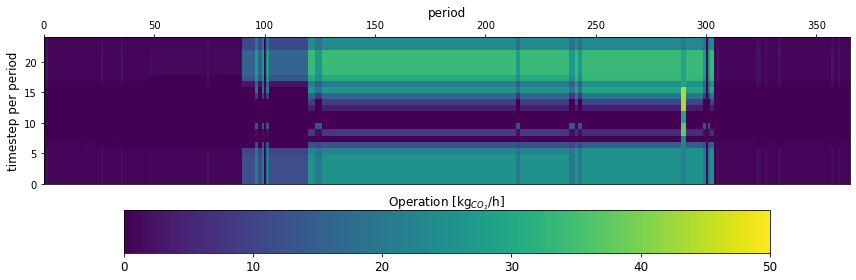

In [34]:
fig, ax = fn.plotOperationColorMap(esM, "CO2 to enviroment", "KolymbiaBay", vmax=50)

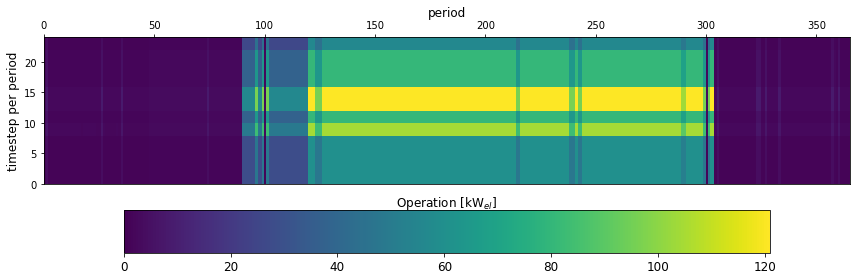

In [35]:
fig, ax = fn.plotOperationColorMap(esM, 'Electricity demand', 'KolymbiaBay')

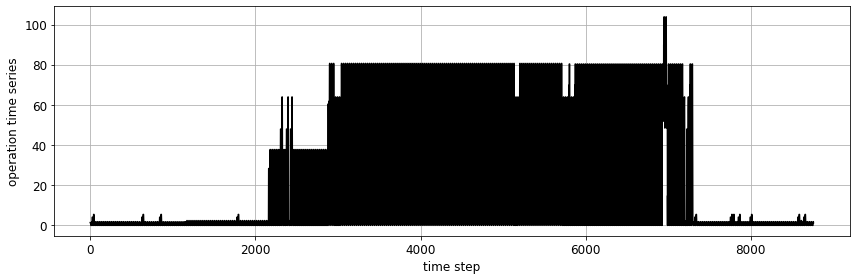

In [36]:
fig, ax = fn.plotOperation(esM, 'Utility', 'KolymbiaBay')

Electricity taken from utility provider correlates with CO2 emissions associated with the hotel. This is the only thing related to CO2 in the model. Aim to minimise this and minimise cost. This will change significanty if I great a typical daily profile and apply to demand.